<a href="https://colab.research.google.com/github/spetznick/applied-gpu-programming/blob/colab-s/assignment-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Assignment 3 Exercise 2



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/My Drive/DD2360/DD2360-PIC")

In [3]:
!nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
Fri Dec 13 15:52:24 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8               9W /  7

## We compile the saved cuda code using nvcc compiler

In [18]:
!pwd
!make clean
!make

/content/drive/MyDrive/DD2360/DD2360-PIC
rm -rf  src/ConfigFile.o src/EMfield.o src/EMfield_aux.o src/Particles_aux.o src/Timing.o src/RW_IO.o src/TransArraySpace3D.o src/InterpDensNet.o src/Grid.o src/InterpDensSpecies.o src/BC.o src/Basic.o src/sputniPIC.o src/Particles.o
rm -rf sputniPIC.out
[ -d src ] || mkdir src
nvcc -std=c++11 -I./include -O3 -g -Xcompiler -Wall src/ConfigFile.cpp -c -o src/ConfigFile.o
[ -d src ] || mkdir src
nvcc -std=c++11 -I./include -O3 -g -Xcompiler -Wall src/EMfield.cpp -c -o src/EMfield.o
[ -d src ] || mkdir src
nvcc -std=c++11 -I./include -O3 -g -Xcompiler -Wall src/EMfield_aux.cpp -c -o src/EMfield_aux.o
[ -d src ] || mkdir src
nvcc -std=c++11 -I./include -O3 -g -Xcompiler -Wall src/Particles_aux.cpp -c -o src/Particles_aux.o
src/Particles_aux.cpp: In function ‘void particle_aux_allocate(particles*, particles_aux*, int)’:
src/Particles_aux.cpp:14:10: warning: unused variable ‘npmax’ []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wu

In [19]:
!./bin/sputniPIC.out ./inputfiles/GEM_2D.inp


-------------------------
sputniPIC Sim. Parameters
-------------------------
Number of species    = 4
Number of particles of species 0 = 4096000	 (MAX = 4096000)  QOM = -64
Number of particles of species 1 = 4096000	 (MAX = 4096000)  QOM = 1
Number of particles of species 2 = 4096000	 (MAX = 4096000)  QOM = -64
Number of particles of species 3 = 4096000	 (MAX = 4096000)  QOM = 1
x-Length                 = 40
y-Length                 = 20
z-Length                 = 1
Number of cells (x)      = 256
Number of cells (y)      = 128
Number of cells (z)      = 1
Time step                = 0.25
Number of cycles         = 10
Results saved in: data
*************************************************
**  Initialize GEM Challenge with Pertubation  **
*************************************************
** B0x = 0.0195
** B0y = 0
** B0z = 0
** Delta (current sheet thickness) = 0.5
** rho species 0 = 1 CURRENT SHEET 
** rho species 1 = 1 CURRENT SHEET 
** rho species 2 = 0.02 BACKGROUND 
** rho species

CPU:
- Tot. Simulation Time (s) = 79.0391
- Mover Time / Cycle   (s) = 3.35283
- Interp. Time / Cycle (s) = 4.25696

GPU:
- Tot. Simulation Time (s) = 50.2905
- Mover Time / Cycle   (s) = 0.276141
- Interp. Time / Cycle (s) = 4.39823

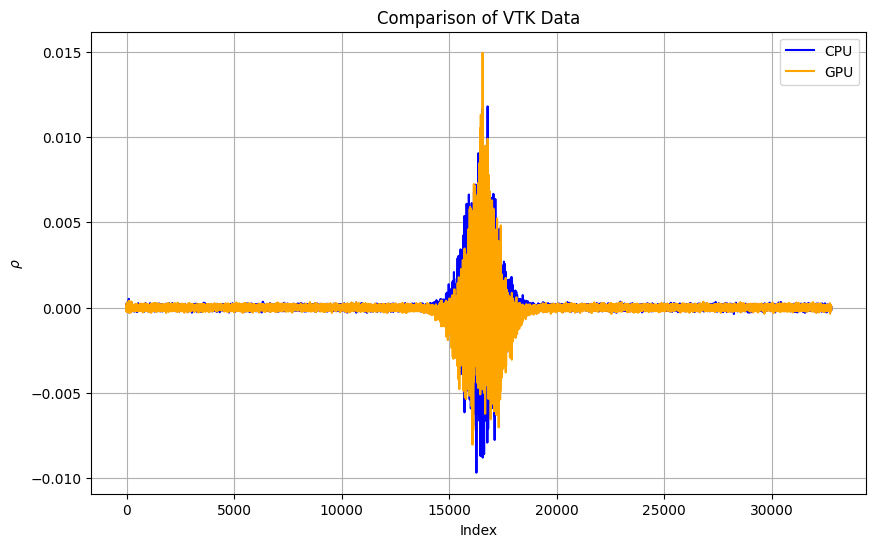

<Figure size 640x480 with 0 Axes>

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def parse_vtk_file(filepath):
    """
    Parses a VTK file with structured points and extracts the data values.

    Args:
        filepath (str): Path to the VTK file.

    Returns:
        np.ndarray: Extracted data values as a NumPy array.
    """
    with open(filepath, 'r') as file:
        lines = file.readlines()

    # Find the start of the data
    data_start_idx = None
    for idx, line in enumerate(lines):
        if line.strip() == "LOOKUP_TABLE default":
            data_start_idx = idx + 1
            break

    if data_start_idx is None:
        raise ValueError("Could not find the data section in the VTK file.")

    # Extract data values as floats
    data_values = [float(value.strip()) for value in lines[data_start_idx:]]
    return np.array(data_values)

def plot_vtk_files(file1, file2):
    """
    Plots the data from two VTK files on the same graph.

    Args:
        file1 (str): Path to the first VTK file.
        file2 (str): Path to the second VTK file.
    """
    # Parse the files
    data1 = parse_vtk_file(file1)
    data2 = parse_vtk_file(file2)

    # Generate indices for x-axis
    indices = np.arange(len(data1))

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(indices, data1, label="CPU", color='blue')
    plt.plot(indices, data2, label="GPU", color='orange')
    plt.xlabel("Index")
    plt.ylabel(r"$\rho$")
    plt.title("Comparison of VTK Data")
    plt.legend()
    plt.grid()
    plt.show()

# Paths to the VTK files
file1_path = "./data/rho_net_10_cpu.vtk"
file2_path = "./data/rho_net_10_gpu.vtk"

# Plot the data from both files
plot_vtk_files(file1_path, file2_path)
# Save figure as png
plt.savefig("./data/results.png")